In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)
general_data=pd.read_csv('/kaggle/input/hr-analytics-case-study/general_data.csv')
employee_survey_data=pd.read_csv('/kaggle/input/hr-analytics-case-study/employee_survey_data.csv')
manager_survey_data=pd.read_csv('/kaggle/input/hr-analytics-case-study/manager_survey_data.csv')

In [3]:
print('\n','-'*20,'General info','-'*20,'\n')
general_data.info()
print('\n','-'*20,'Employee Survey info','-'*20,'\n')
employee_survey_data.info()
print('\n','-'*20,'Manager Survey info','-'*20,'\n')
manager_survey_data.info()


 -------------------- General info -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome      

In [4]:
print(general_data.EmployeeID.nunique())
print(employee_survey_data.EmployeeID.nunique())
print(manager_survey_data.EmployeeID.nunique())

4410
4410
4410


In [5]:
general_data.set_index('EmployeeID')
employee_survey_data.set_index('EmployeeID')
manager_survey_data.set_index('EmployeeID')
data=pd.concat([general_data,employee_survey_data,manager_survey_data],axis=1)

In [6]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,1,3.0,4.0,2.0,1,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,3.0,2.0,4.0,2,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,2.0,2.0,1.0,3,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4,4.0,4.0,3.0,4,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,5,4.0,1.0,3.0,5,3,3


In [7]:
print(f'There is {data.isna().any(axis=1).mean()*100:.2f}% Nans')

There is 2.49% Nans


In [8]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410.000000,4410,4410.000000,4410,4410,4410.000000,4391.000000,4410,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,NaN,9,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3699,3129,2883,NaN,NaN,1818,NaN,NaN,2646,NaN,978,2019,NaN,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,2205.500000,NaN,2.063946,NaN,NaN,65029.312925,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2205.500000,2.723603,2.728246,2.761436,2205.500000,2.729932,3.153741
std,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,1273.201673,NaN,1.106689,NaN,NaN,47068.888559,2.498887,NaN,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1273.201673,1.092756,1.101253,0.706245,1273.201673,0.711400,0.360742
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,1.000000,NaN,NaN,10090.000000,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,1103.250000,NaN,1.000000,NaN,NaN,29110.000000,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,1103.250000,2.000000,2.000000,2.000000,1103.250000,2.000000,3.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,2205.500000,NaN,2.000000,NaN,NaN,49190.000000,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,2205.500000,3.000000,3.000000,3.000000,2205.500000,3.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,3307.750000,NaN,3.000000,NaN,NaN,83800.000000,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3307.750000,4.000000,4.000000,3.000000,3307.750000,3.000000,3.000000


In [9]:
# last year arrtrition
data.Attrition.value_counts(normalize=True).to_frame()

,Attrition
No,0.838776
Yes,0.161224


/tmp/ipykernel_31/2615748143.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(1,2,1)
/tmp/ipykernel_31/2615748143.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age,bins=23)


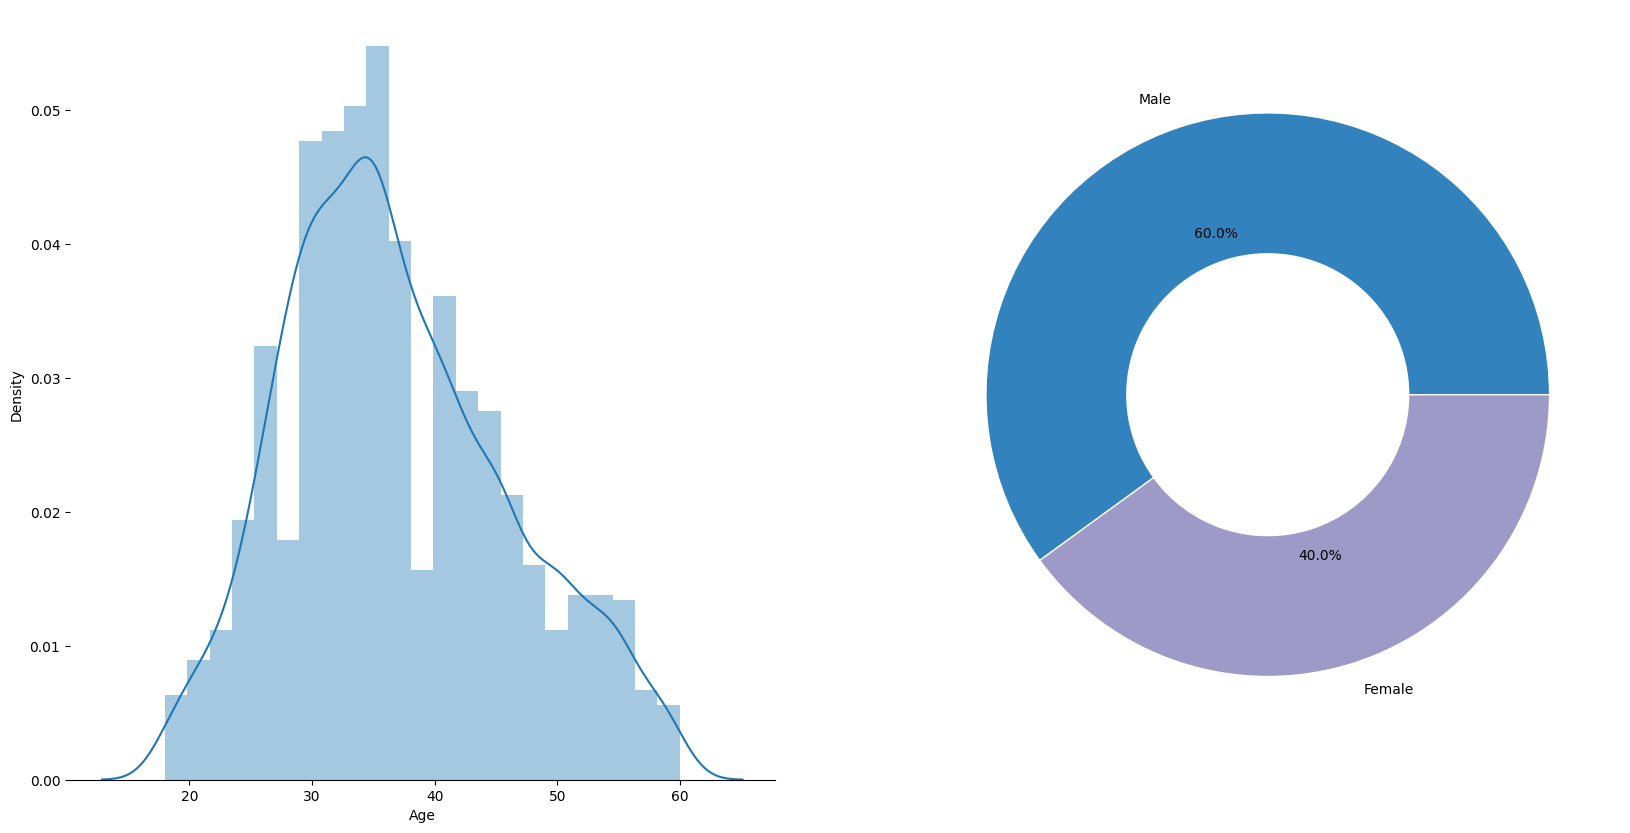

In [10]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*13)

plt.subplots(figsize=(20,10))
ax=plt.subplot(1,2,1)
sns.distplot(data.Age,bins=23)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.subplot(1,2,2)
plt.pie(data.Gender.value_counts(normalize=True),radius=1,autopct='%1.1f%%',wedgeprops=dict(width=0.5, edgecolor='w'),colors=outer_colors,labels=['Male','Female'])
plt.show()

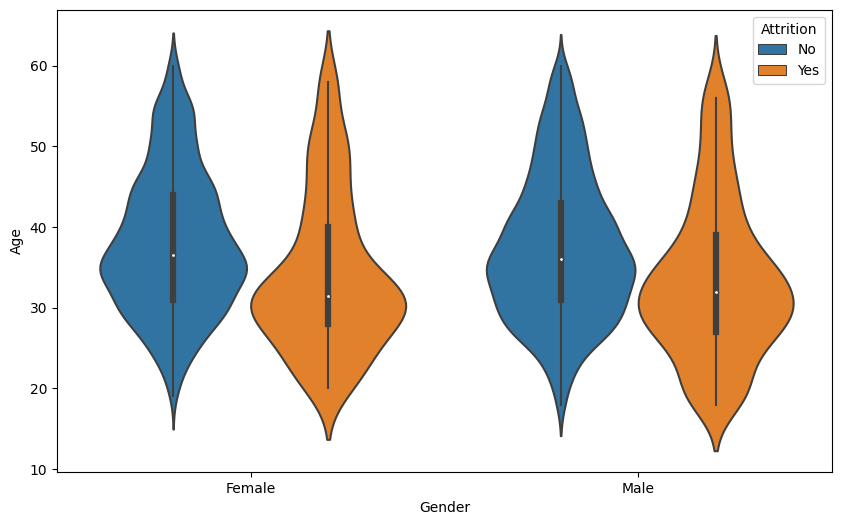

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data,x='Gender',y='Age',hue='Attrition')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data_labeled=data.copy()
data_labeled['Attrition'] = labelEncoder_X.fit_transform(data_labeled['Attrition'])
data_labeled['BusinessTravel'] = labelEncoder_X.fit_transform(data_labeled['BusinessTravel'])
data_labeled['Department'] = labelEncoder_X.fit_transform(data_labeled['Department'])
data_labeled['EducationField'] = labelEncoder_X.fit_transform(data_labeled['EducationField'])
data_labeled['Gender'] = labelEncoder_X.fit_transform(data_labeled['Gender'])
data_labeled['JobRole'] = labelEncoder_X.fit_transform(data_labeled['JobRole'])
data_labeled['MaritalStatus'] = labelEncoder_X.fit_transform(data_labeled['MaritalStatus'])
data_labeled.drop(['Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [13]:
# check relationship between attrition and other features.
data_labeled.corr()['Attrition'].sort_values().to_frame()

,Attrition
TotalWorkingYears,-0.170338
Age,-0.159205
YearsWithCurrManager,-0.156199
YearsAtCompany,-0.134392
JobSatisfaction,-0.102847
EnvironmentSatisfaction,-0.102142
WorkLifeBalance,-0.062756
EducationField,-0.057940
TrainingTimesLastYear,-0.049431
Department,-0.048206


/tmp/ipykernel_31/4152398149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_labeled[data_labeled['Attrition']==1].TotalWorkingYears,label='yes')
/tmp/ipykernel_31/4152398149.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_labeled.TotalWorkingYears,label='all')


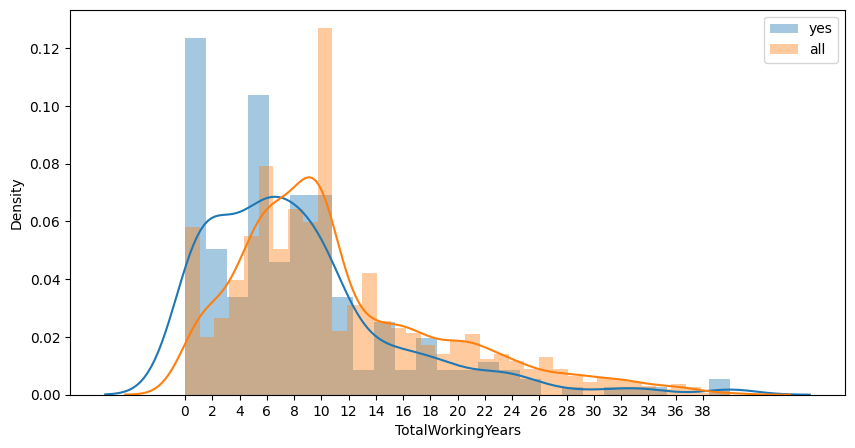

In [14]:
data_labeled.dropna(inplace=True)
ax=plt.figure(figsize=(10,5))
sns.distplot(data_labeled[data_labeled['Attrition']==1].TotalWorkingYears,label='yes')
sns.distplot(data_labeled.TotalWorkingYears,label='all')
plt.xticks(range(0,40,2))
plt.legend()
plt.show()

/tmp/ipykernel_31/355669584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Attrition']=='Yes'].Age,label='yes')
/tmp/ipykernel_31/355669584.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age,label='all')


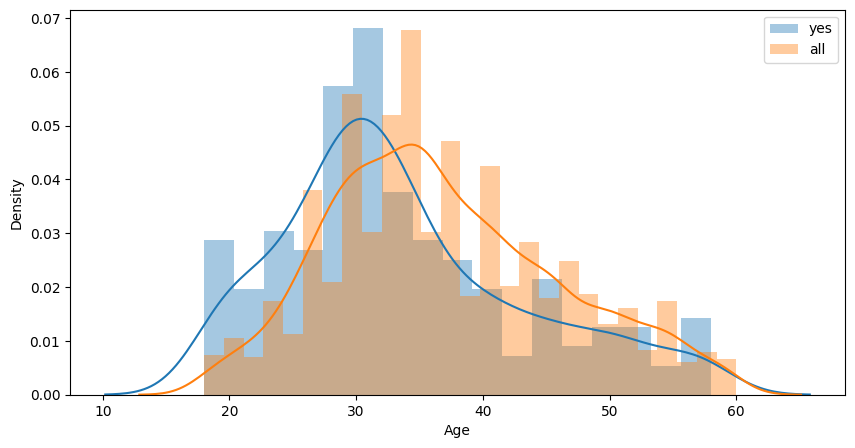

In [15]:
plt.subplots(figsize=(10,5))
sns.distplot(data[data['Attrition']=='Yes'].Age,label='yes')
sns.distplot(data.Age,label='all')
plt.legend()
plt.show()

/tmp/ipykernel_31/3658567003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Attrition']=='Yes'].YearsWithCurrManager,label='yes')
/tmp/ipykernel_31/3658567003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.YearsWithCurrManager,label='all')


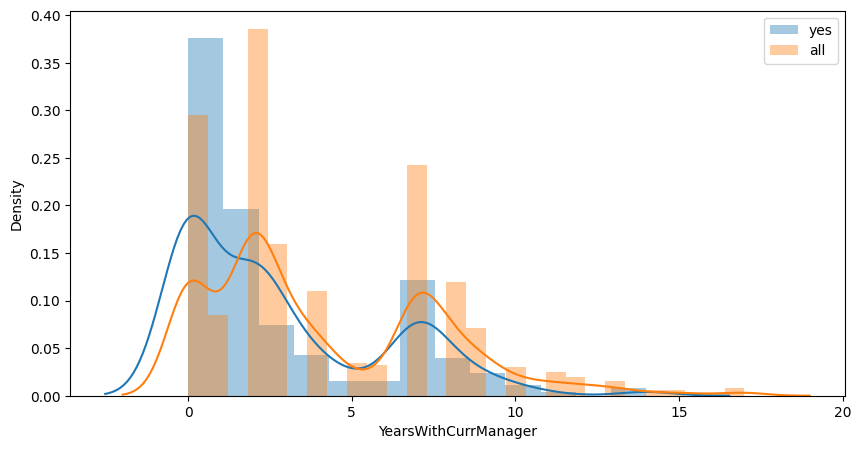

In [16]:
plt.subplots(figsize=(10,5))
sns.distplot(data[data['Attrition']=='Yes'].YearsWithCurrManager,label='yes')
sns.distplot(data.YearsWithCurrManager,label='all')
plt.legend()
plt.show()

/tmp/ipykernel_31/1113567239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Attrition']=='Yes'].YearsAtCompany,label='yes')
/tmp/ipykernel_31/1113567239.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.YearsAtCompany,label='all')


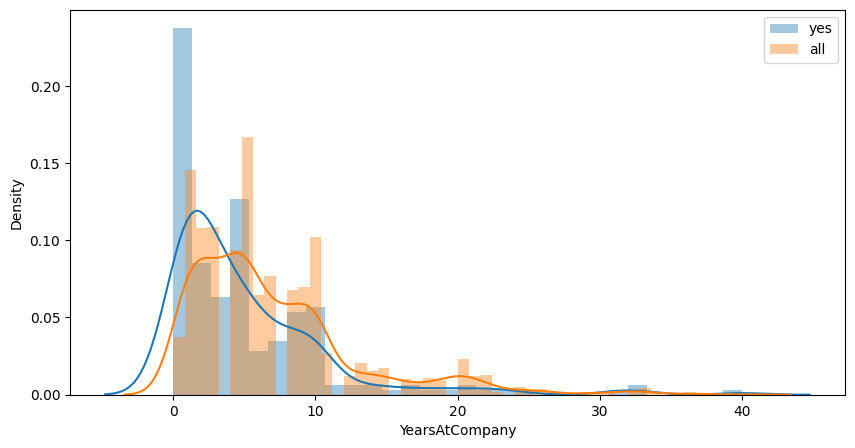

In [17]:
plt.subplots(figsize=(10,5))
sns.distplot(data[data['Attrition']=='Yes'].YearsAtCompany,label='yes')
sns.distplot(data.YearsAtCompany,label='all')
plt.legend()
plt.show()

/tmp/ipykernel_31/3524398933.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


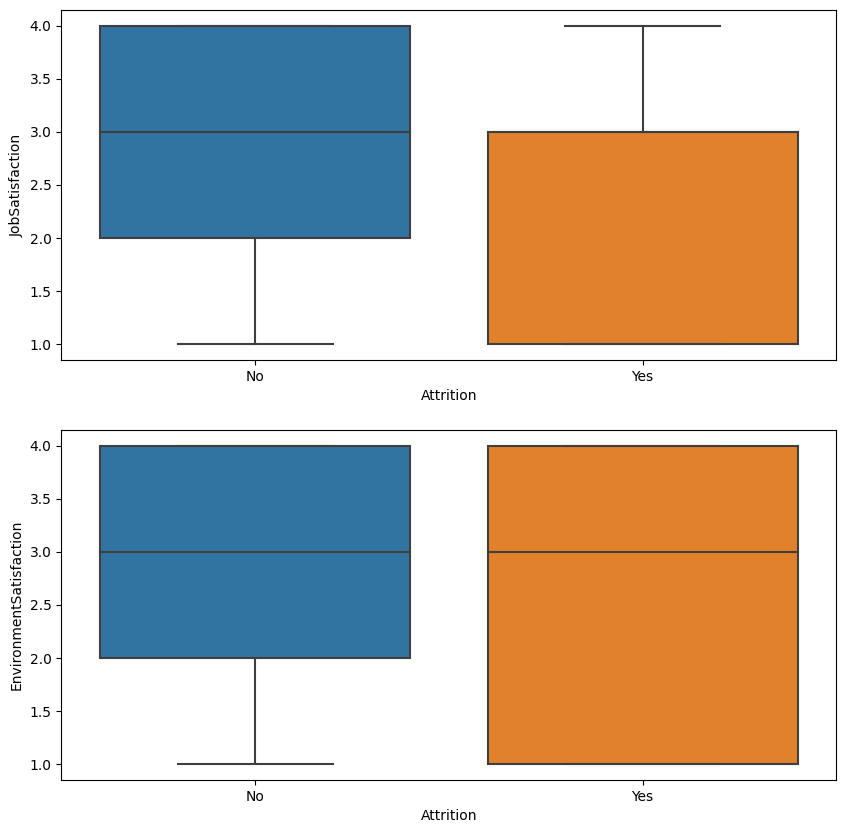

In [18]:
plt.subplots(figsize=(10,10))
plt.subplot(2,1,1)
sns.boxplot(data=data,x='Attrition',y='JobSatisfaction')
plt.subplot(2,1,2)
sns.boxplot(data=data,x='Attrition',y='EnvironmentSatisfaction')
plt.show()

In [19]:
pd.crosstab(data['Attrition'],data['MaritalStatus'],margins=True,normalize=True)

MaritalStatus,Divorced,Married,Single,All
Attrition,,,,
No,0.200000,0.400680,0.238095,0.838776
Yes,0.022449,0.057143,0.081633,0.161224
All,0.222449,0.457823,0.319728,1.000000


In [20]:
data_left=data[data.Attrition=='Yes']

/tmp/ipykernel_31/1272515591.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_left.Age,ax=ax)
/tmp/ipykernel_31/1272515591.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_left.YearsAtCompany,ax=ax)
/tmp/ipykernel_31/1272515591.py:7: UserWarning: 

`distplot` is a deprecated func

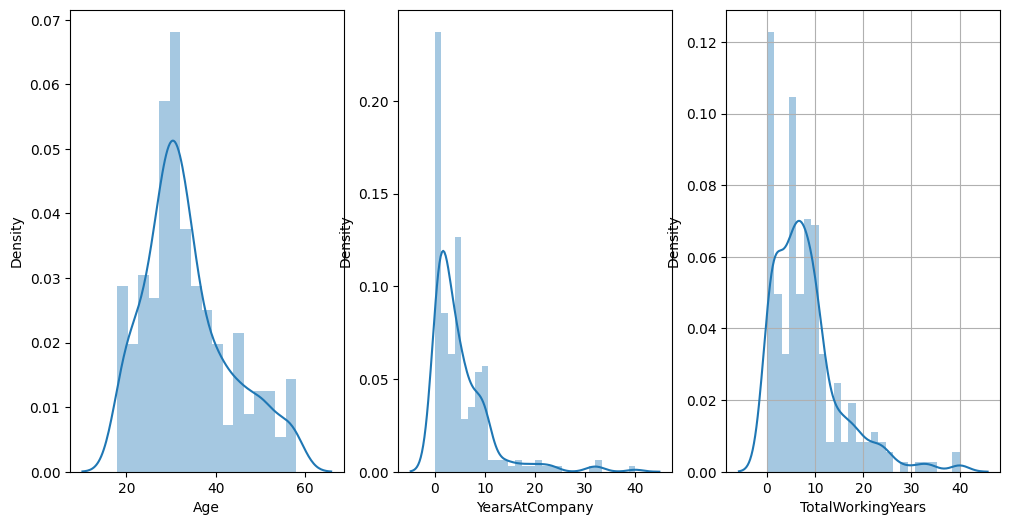

In [21]:
plt.figure(figsize=(12,6))
ax=plt.subplot(131)
sns.distplot(data_left.Age,ax=ax)
ax=plt.subplot(132)
sns.distplot(data_left.YearsAtCompany,ax=ax)
ax=plt.subplot(133)
sns.distplot(data_left.TotalWorkingYears,ax=ax)
plt.grid()
plt.show()

In [22]:
data[data.Attrition=='Yes'].Gender.value_counts(normalize=True)

Male      0.620253
Female    0.379747
Name: Gender, dtype: float64

In [23]:
data_labeled[data_labeled.Age>40].corr()['Attrition']

Age                        0.042887
Attrition                  1.000000
BusinessTravel            -0.007543
Department                -0.017989
DistanceFromHome           0.024490
Education                  0.007575
EducationField             0.024692
EmployeeID                 0.006481
Gender                     0.000482
JobLevel                  -0.006060
JobRole                    0.053967
MaritalStatus              0.084700
MonthlyIncome             -0.020140
NumCompaniesWorked         0.084549
PercentSalaryHike         -0.009985
StockOptionLevel           0.006319
TotalWorkingYears         -0.101955
TrainingTimesLastYear     -0.097360
YearsAtCompany             0.007207
YearsSinceLastPromotion    0.051307
YearsWithCurrManager      -0.031213
EmployeeID                 0.006481
EnvironmentSatisfaction   -0.125539
JobSatisfaction           -0.021097
WorkLifeBalance           -0.060418
EmployeeID                 0.006481
JobInvolvement             0.062294
PerformanceRating          0

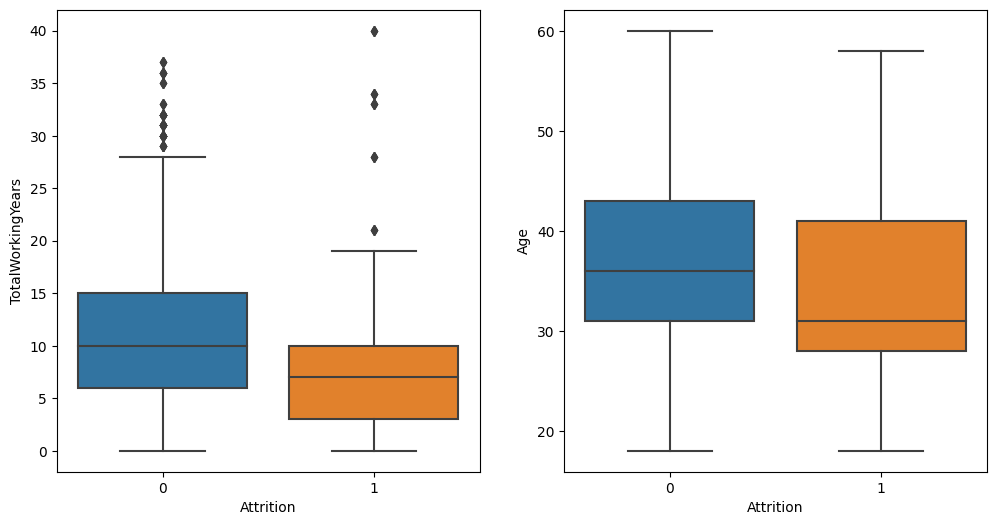

In [24]:
plt.figure(figsize=(12,6))
ax=plt.subplot(121)
sns.boxplot(data=data_labeled[data_labeled.JobSatisfaction>3],x='Attrition',y='TotalWorkingYears',ax=ax)
ax=plt.subplot(122)
sns.boxplot(data=data_labeled[data_labeled.JobSatisfaction>3],x='Attrition',y='Age',ax=ax)
plt.show()

In [25]:
data_labeled.drop(columns=['EmployeeID'],inplace=True)

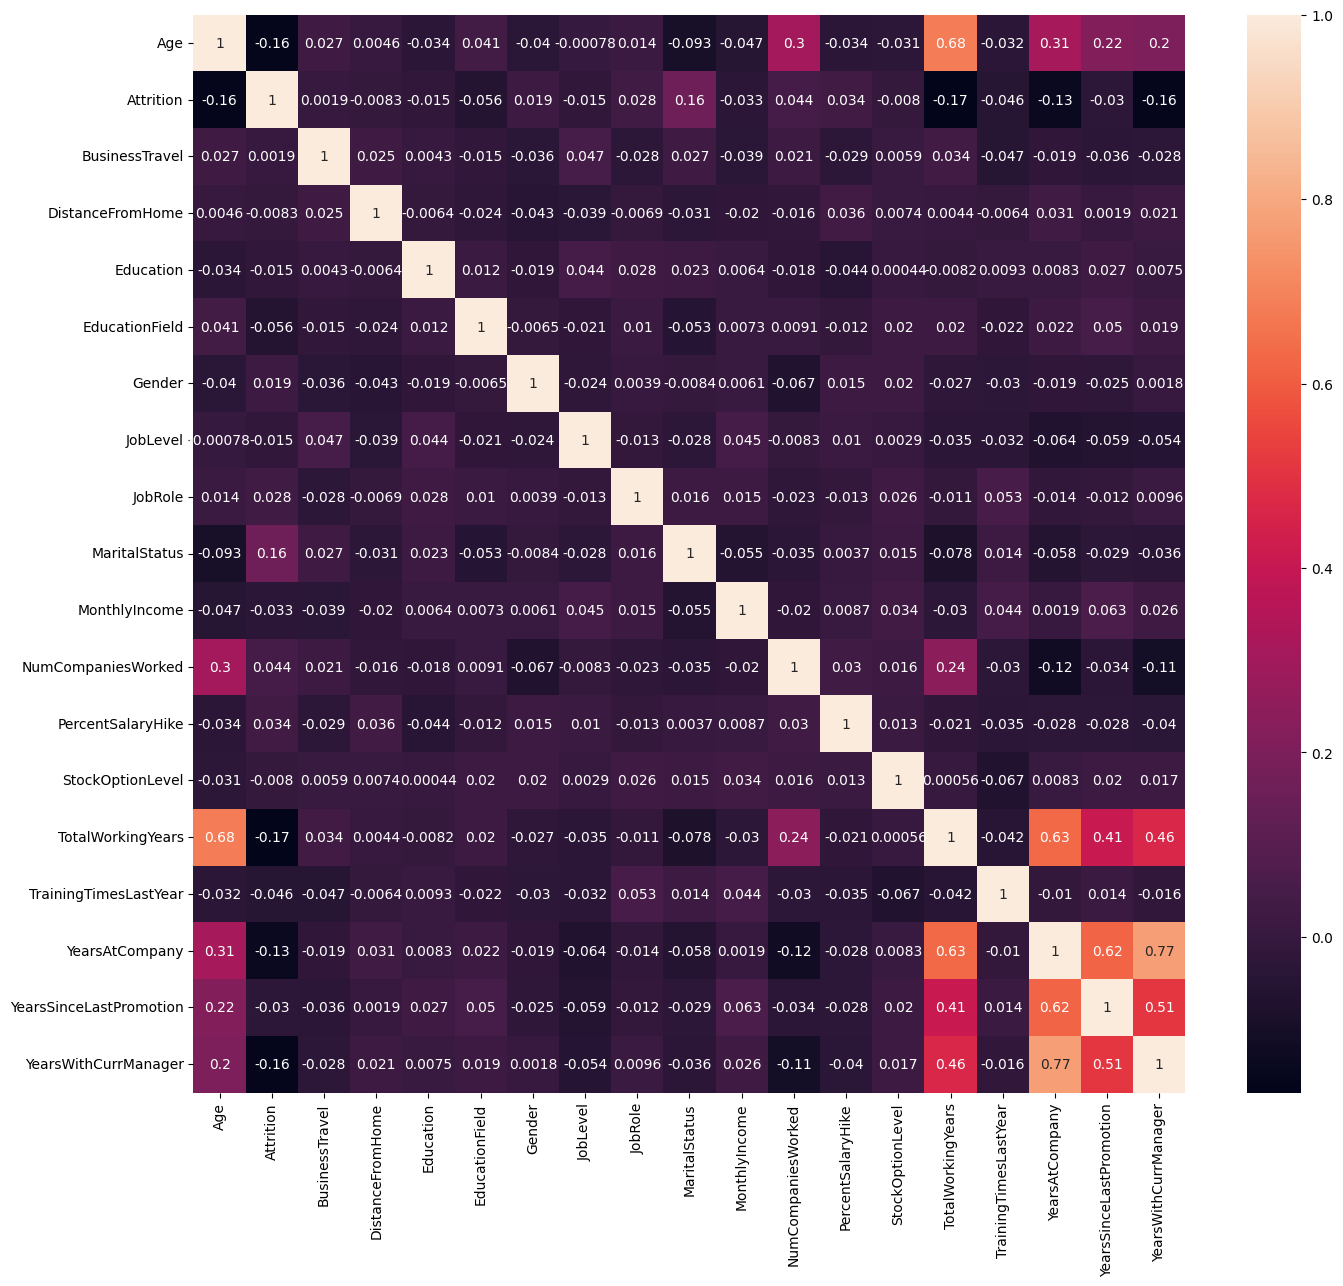

In [26]:
corr_cols = ['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
corr = data_labeled[corr_cols].corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr, annot =True)
plt.show()

In [27]:
y = data_labeled['Attrition']
x = data_labeled.drop('Attrition', axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=1)

In [29]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
#confusion matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8616279069767442
[[720  10]
 [109  21]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       730
           1       0.68      0.16      0.26       130

    accuracy                           0.86       860
   macro avg       0.77      0.57      0.59       860
weighted avg       0.84      0.86      0.82       860



In [33]:
cols_todrop = ['JobLevel','Department','JobRole','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel',
               'YearsWithCurrManager']
x = data_labeled.drop(['Attrition'], axis=1).reset_index(drop=True)
y = data_labeled['Attrition'].values
x.drop(cols_todrop, axis=1, inplace=True)
x.Age = pd.cut(x.Age, 4)

In [34]:
x = pd.get_dummies(x)
x_copy=x.copy()

In [35]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, mean_squared_error

In [38]:
def get_scores(score1, score2):
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('ADA', AdaBoostClassifier()))
    models.append(('GradientBooster', GradientBoostingClassifier()))
    models.append(('ExtraTrees', ExtraTreesClassifier()))
    models.append(('RandomForest', RandomForestClassifier()))
    cv_scores = []
    test_scores = []
    names = []
    stds = []
    differences = []
    #res = pd.DataFrame(columns = {'Model',score+('(train)'), 'Std', score+('(test_score)'), 'difference'})
    #res = res[['Model',score+('(train)'), 'Std', score+('(test_score)'), 'difference']]
    res = pd.DataFrame()
    for index, model in enumerate(models):
        kfold = StratifiedKFold(n_splits=7)
        cv_results = cross_val_score(model[1], x_train, y_train, cv=kfold, scoring=score1)
        cv_scores.append(cv_results)
        names.append(model[0])
        model[1].fit(x_train,y_train)
        predictions = model[1].predict(x_test)
        test_score = score2(predictions, y_test)
        test_scores.append(test_score)
        stds.append(cv_results.std())
        differences.append((cv_results.mean() - test_score))
        res.loc[index,'Model'] = model[0]
        res.loc[index,score1+('(train)')] = cv_results.mean()
        res.loc[index,score1+('(test_score)')] = test_score
        res.loc[index,'Std'] = cv_results.std()
        res.loc[index,'difference'] = cv_results.mean() - test_score
    return res

In [39]:
get_scores('accuracy', accuracy_score)

,Model,accuracy(train),accuracy(test_score),Std,difference
0,LR,0.843308,0.834884,0.010517,0.008424
1,LDA,0.843310,0.836047,0.008134,0.007264
2,KNN,0.829365,0.819767,0.012114,0.009598
3,CART,0.972092,0.990698,0.006508,-0.018605
4,NB,0.793020,0.818605,0.021517,-0.025585
5,SVM,0.877615,0.873256,0.009709,0.004359
6,ADA,0.859004,0.841860,0.008730,0.017144
7,GradientBooster,0.885171,0.873256,0.007093,0.011915
8,ExtraTrees,0.981687,0.996512,0.006877,-0.014825
9,RandomForest,0.984012,0.996512,0.006478,-0.012500


In [40]:
params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}
RandomForest = RandomForestClassifier()
randomgrid_forest = RandomizedSearchCV(estimator=RandomForest, param_distributions = params, 
                               cv=5, n_iter=25, scoring = 'accuracy',
                               n_jobs = 4, verbose = 3, random_state = 42,
                               return_train_score = True)
randomgrid_forest.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=3)

In [41]:
forest_preds = randomgrid_forest.predict(x_test)
print(classification_report(y_test,forest_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       717
           1       1.00      0.92      0.96       143

    accuracy                           0.99       860
   macro avg       0.99      0.96      0.98       860
weighted avg       0.99      0.99      0.99       860



In [42]:
feature_importances_=randomgrid_forest.best_estimator_.feature_importances_.tolist()
feature_names = x_copy.columns
pd.DataFrame(pd.Series(feature_importances_,feature_names),columns=['importance']).sort_values('importance',ascending=False)

,importance
MonthlyIncome,0.131872
TotalWorkingYears,0.116567
YearsAtCompany,0.092221
DistanceFromHome,0.090049
TrainingTimesLastYear,0.054675
EnvironmentSatisfaction,0.053754
JobSatisfaction,0.053714
YearsSinceLastPromotion,0.053071
EducationField,0.051578
MaritalStatus,0.049392


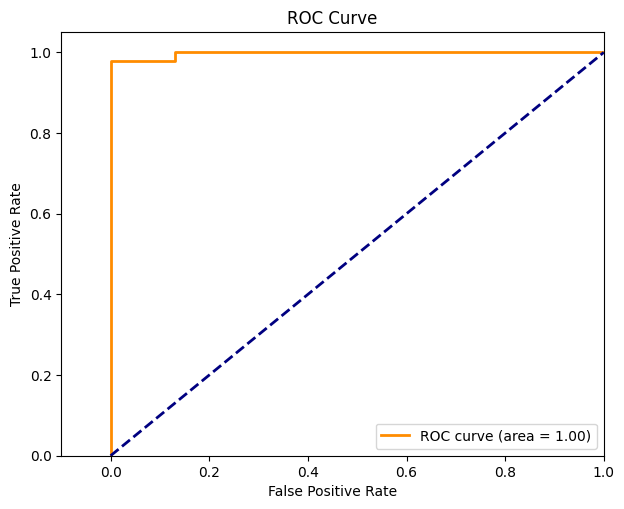

In [43]:
from sklearn.metrics import roc_curve, auc
y_score = randomgrid_forest.predict_proba(x_test)  # 随机森林
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
drawRoc(roc_auc, fpr, tpr)